In [1]:
import numpy as np
import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm,ListedColormap, LinearSegmentedColormap
import wrf
import re

In [2]:
colors = [[0.43, 0.89, 1.0],
 [0.67, 0.94, 1.0],
 [1.0, 0.77, 0.89],
 [1.0, 0.6, 0.8],
 [1.0, 0.0, 1.0],
 [0.50, 0.0, 0.50],
 [0.0, 0.0, 0.50],
 [0.27, 0.27, 1.0],
 [0.2, 0.4, 1.0],
 [0.52, 0.64, 1.0],
 [1.0, 1.0, 1.0], ## URBAN IN ORIGINAL FILE
 [0.8, 0.8, 0.8],
 [0.70, 0.70, 0.70],
 [0.0, 0.0, 0.0],
 [0.6, 0.6, 0.6],
 [0.35, 0.35, 0.35],
 [0.50, 0.50, 0.0],
 [0.0, 0.36, 0.0],
 [0.0, 0.50, 0.0],
 [0.2, 0.6, 0.4],
 [0.62, 0.84, 0.0],
 [0.70, 0.70, 0.70],
 [0.70, 0.70, 0.70],
 [0.70, 0.70, 0.70],
 [0.70, 0.70, 0.70],
 [0.70, 0.70, 0.70],
 [0.70, 0.70, 0.70],
 [0.70, 0.70, 0.70],
 [0.70, 0.70, 0.70],
 [0.70, 0.70, 0.70],
 [0.70, 0.70, 0.70],
 [0.70, 0.70, 0.70],
 [0.83, 1.0, 0.35],
 [1.0, 1.0, 0.0],
 [1.0, 0.72, 0.44],
 [1.0, 0.6, 0.0],
 [1.0, 0.4, 0.0],
 [1.0, 0.0, 0.0],
 [0.64, 0.44, 1.0],
 [0.74, 0.29, 0.0],
 [0.67, 0.0, 0.22],
 [0.52, 0.0, 0.0]]


cmap = LinearSegmentedColormap.from_list(
        'luse', colors, N=41)
levels=np.arange(0,41)
norm = BoundaryNorm(levels, ncolors=cmap.N,clip=True)

In [3]:
orig_file = nc.Dataset("./geo_em.d04.nc")
orig_var = wrf.getvar(orig_file, "LU_INDEX")
lat, lon = wrf.latlon_coords(orig_var)
cart_proj = wrf.get_cartopy(orig_var)

w2w_file = nc.Dataset("./geo_em.d04_LCZ_params.nc")
w2w_var = wrf.getvar(w2w_file, "LU_INDEX")

nat_file = nc.Dataset("./geo_em.d04_NoUrban.nc")
nat_var = wrf.getvar(nat_file, "LU_INDEX")

ext_file = nc.Dataset("./geo_em.d04_LCZ_extent.nc")
ext_var = wrf.getvar(ext_file, "LU_INDEX")




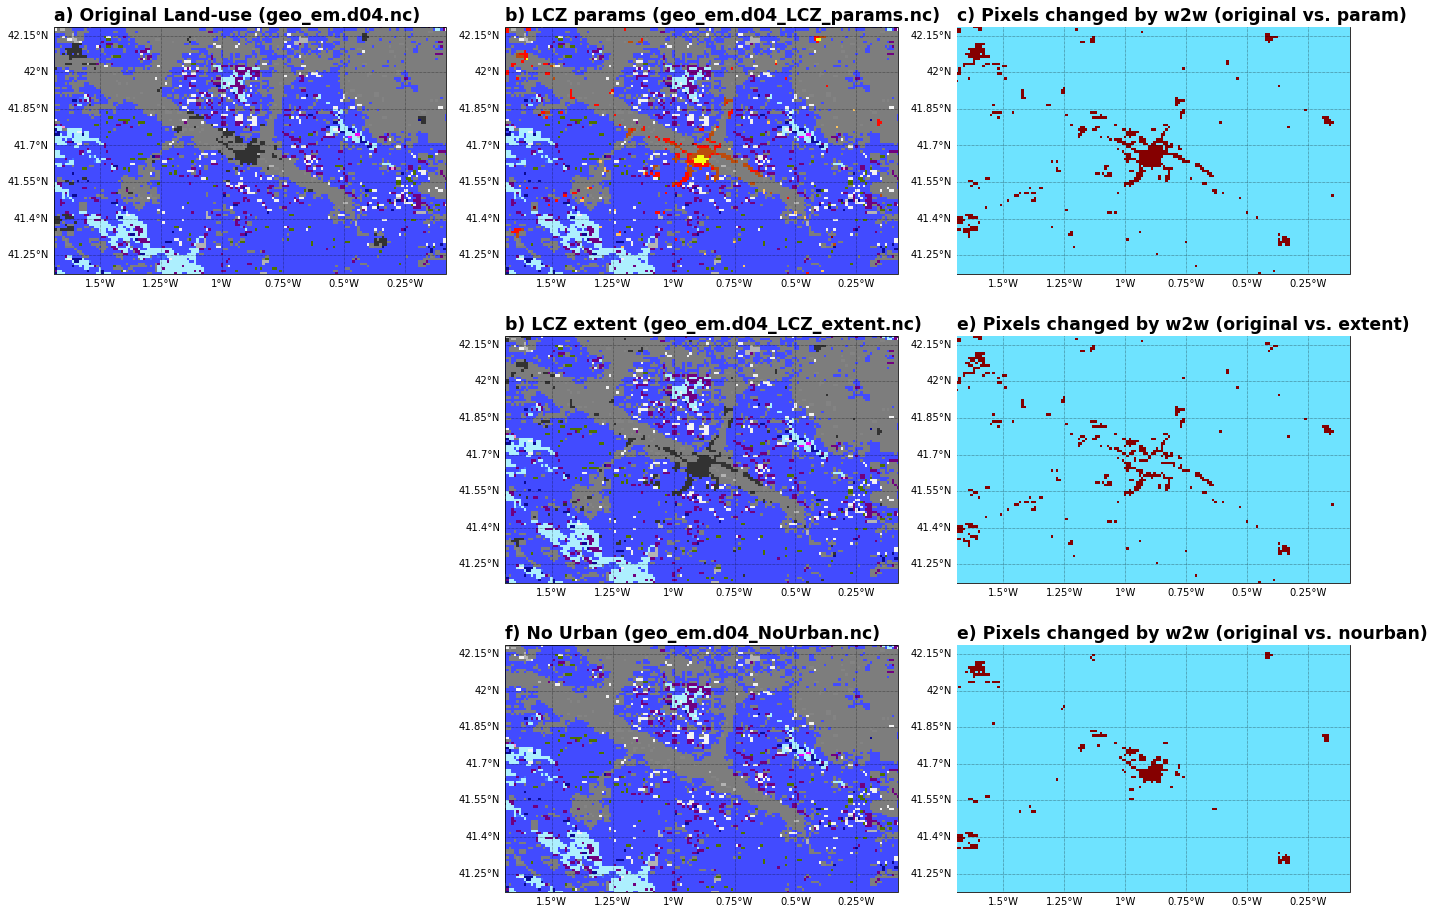

In [4]:




fig = plt.figure(figsize=(20, 16))
ax1 = fig.add_subplot(3,3,1,projection=cart_proj)
ax1.coastlines(linewidth=0.4,zorder=102,resolution='10m')
gl1=ax1.gridlines(color="black", linestyle="dotted",linewidth=0.5,zorder=103,draw_labels=True,x_inline=False, y_inline=False)
gl1.right_labels=False
gl1.top_labels=False   
ax1.set_extent([np.min(lon),np.max(lon),np.min(lat),np.max(lat)])
ct1=ax1.pcolormesh(lon,lat,orig_var,cmap=cmap, norm=norm,transform=ccrs.PlateCarree())
ax1.set_title('a) Original Land-use (geo_em.d04.nc)',loc='left',fontsize='xx-large',fontweight='bold')

ax2 = fig.add_subplot(3,3,2,projection=cart_proj)
ax2.coastlines(linewidth=0.4,zorder=102,resolution='10m')
gl2=ax2.gridlines(color="black", linestyle="dotted",linewidth=0.5,zorder=103,draw_labels=True,x_inline=False, y_inline=False)
gl2.right_labels=False
gl2.top_labels=False   
ax2.set_extent([np.min(lon),np.max(lon),np.min(lat),np.max(lat)])
ct2=ax2.pcolormesh(lon,lat,w2w_var,cmap=cmap, norm=norm,transform=ccrs.PlateCarree())
ax2.set_title('b) LCZ params (geo_em.d04_LCZ_params.nc)',loc='left',fontsize='xx-large',fontweight='bold')

ax3 = fig.add_subplot(3,3,3,projection=cart_proj)
ax3.coastlines(linewidth=0.4,zorder=102,resolution='10m')
gl3=ax3.gridlines(color="black", linestyle="dotted",linewidth=0.5,zorder=103,draw_labels=True,x_inline=False, y_inline=False)
gl3.right_labels=False
gl3.top_labels=False   
ax3.set_extent([np.min(lon),np.max(lon),np.min(lat),np.max(lat)])
ct3=ax3.pcolormesh(lon,lat,(w2w_var-orig_var)!=0,cmap=cmap,transform=ccrs.PlateCarree(),zorder=101)
ax3.set_title('c) Pixels changed by w2w (original vs. param) ',loc='left',fontsize='xx-large',fontweight='bold')

ax5 = fig.add_subplot(3,3,5,projection=cart_proj)
ax5.coastlines(linewidth=0.4,zorder=102,resolution='10m')
gl5=ax5.gridlines(color="black", linestyle="dotted",linewidth=0.5,zorder=103,draw_labels=True,x_inline=False, y_inline=False)
gl5.right_labels=False
gl5.top_labels=False   
ax5.set_extent([np.min(lon),np.max(lon),np.min(lat),np.max(lat)])
ct5=ax5.pcolormesh(lon,lat,ext_var,cmap=cmap, norm=norm,transform=ccrs.PlateCarree())
ax5.set_title('b) LCZ extent (geo_em.d04_LCZ_extent.nc)',loc='left',fontsize='xx-large',fontweight='bold')

ax6 = fig.add_subplot(3,3,6,projection=cart_proj)
ax6.coastlines(linewidth=0.4,zorder=102,resolution='10m')
gl6=ax6.gridlines(color="black", linestyle="dotted",linewidth=0.5,zorder=103,draw_labels=True,x_inline=False, y_inline=False)
gl6.right_labels=False
gl6.top_labels=False   
ax6.set_extent([np.min(lon),np.max(lon),np.min(lat),np.max(lat)])
ct6=ax6.pcolormesh(lon,lat,(ext_var-orig_var)!=0,cmap=cmap,transform=ccrs.PlateCarree(),zorder=101)
ax6.set_title('e) Pixels changed by w2w (original vs. extent) ',loc='left',fontsize='xx-large',fontweight='bold')

ax8 = fig.add_subplot(3,3,8,projection=cart_proj)
ax8.coastlines(linewidth=0.4,zorder=102,resolution='10m')
gl8=ax8.gridlines(color="black", linestyle="dotted",linewidth=0.5,zorder=103,draw_labels=True,x_inline=False, y_inline=False)
gl8.right_labels=False
gl8.top_labels=False   
ax8.set_extent([np.min(lon),np.max(lon),np.min(lat),np.max(lat)])
ct8=ax8.pcolormesh(lon,lat,nat_var,cmap=cmap, norm=norm,transform=ccrs.PlateCarree())
ax8.set_title('f) No Urban (geo_em.d04_NoUrban.nc)',loc='left',fontsize='xx-large',fontweight='bold')

ax9 = fig.add_subplot(3,3,9,projection=cart_proj)
ax9.coastlines(linewidth=0.4,zorder=102,resolution='10m')
gl9=ax9.gridlines(color="black", linestyle="dotted",linewidth=0.5,zorder=103,draw_labels=True,x_inline=False, y_inline=False)
gl9.right_labels=False
gl9.top_labels=False   
ax9.set_extent([np.min(lon),np.max(lon),np.min(lat),np.max(lat)])
ct9=ax9.pcolormesh(lon,lat,(nat_var-orig_var)!=0,cmap=cmap,transform=ccrs.PlateCarree(),zorder=101)
ax9.set_title('e) Pixels changed by w2w (original vs. nourban) ',loc='left',fontsize='xx-large',fontweight='bold')

fig.subplots_adjust(left=0.05,right=0.95,top=0.95,bottom=0.18,wspace=0.15,hspace=0.15)
fig.savefig("./W2W-BeforeAfter.png", bbox_inches='tight',dpi=300)
